In [1]:
import requests
import json
import pandas as pd
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import re
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import shapely.wkt

%matplotlib inline

In [2]:
with open('../data/WeGo.json') as fi:
    credentials = json.load(fi)

In [3]:
Authorization = credentials['Authorization']

In [4]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/23'

params_geo = {
    'direction': '1',
    'startDate': '04-01-2022',
    'endDate'  : '04-30-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [5]:
response_geo = requests.get(URL, params = params_geo, headers = headers)

In [6]:
response_geo

<Response [200]>

In [7]:
# res = response.json()
# res

In [8]:
response23_i = response_geo.json()['features']

In [9]:
inbound23_gdf = gpd.GeoDataFrame.from_features(response23_i)
inbound23_gdf

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs
0,"LINESTRING (-86.78110 36.16730, -86.78121 36.1...",UNI2AWN,Union St & 2nd Ave Wb,MCC4_24,Central 4th Ave - Bay 24,24.161,4.601468,5.250716,41.459,5.937,5.269,4.905,4.3050,3.774,3.139,1.540
1,"LINESTRING (-86.76911 36.20381, -86.76915 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.543103,9.541493,86.508,3.920,3.114,2.570,2.0495,1.777,1.554,1.069
2,"LINESTRING (-86.77604 36.16755, -86.77628 36.1...",WOON1SWF,Woodland St & N 1st St Wb,UNI2AWN,Union St & 2nd Ave Wb,24.869,2.018189,12.322434,7.557,2.412,2.253,2.146,1.9845,1.819,1.654,0.880
3,"LINESTRING (-86.77385 36.17218, -86.77381 36.1...",1SOLDSM,N 1st St & Oldham St Sb,WOON1SWF,Woodland St & N 1st St Wb,23.964,1.974912,12.134212,16.379,2.366,2.059,1.926,1.7660,1.628,1.484,1.146
4,"LINESTRING (-86.77266 36.19266, -86.77269 36.1...",DICLIGSF,Dickerson Pike & Ligon Ave Sb,DICRICSN,Dickerson Pike & Richardson Ave Sb,24.381,2.129836,11.447360,24.096,3.403,2.445,2.138,1.8100,1.608,1.432,1.077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,"LINESTRING (-86.76053 36.22505, -86.76060 36.2...",DICHILSF,Dickerson Pike & Hillhurst Dr Sb,DICSUNSN,Dickerson Pike & Sunset Cr Sb,23.132,1.639465,14.109481,9.030,2.005,1.839,1.720,1.5790,1.463,1.331,0.696
488,"LINESTRING (-86.76968 36.20101, -86.76973 36.2...",DICWTRSF,Dickerson Pike & W Trinity Ln Sb,DICGATSN,Dickerson Pike & Gatewood Ave Sb,24.265,2.180138,11.130029,64.966,3.013,2.564,2.251,1.9130,1.700,1.488,0.899
489,"LINESTRING (-86.76408 36.21494, -86.76416 36.2...",DICLORSN,Dickerson Pk & Lorraine Ave Sb,DICLEMSF,Dickerson Pike & Lemuel Rd Sb,24.938,2.327488,10.714556,16.277,3.345,2.594,2.237,1.8720,1.676,1.431,1.180
490,"LINESTRING (-86.77093 36.19825, -86.77103 36.1...",DICMARSM,Dicerkson Pike & Marie Sb,DICLUCSN,Dickerson Pike & Lucile St Sb,23.359,1.994765,11.710151,64.186,2.470,2.037,1.862,1.6905,1.547,1.399,0.827


In [10]:
inbound23_gdf.columns

Index(['geometry', 'fromStopId', 'fromStopName', 'toStopId', 'toStopName',
       'pathLengthMeters', 'averageTravelSeconds', 'averageTravelSpeed',
       'maxSecs', 'percent90Secs', 'percent80Secs', 'percent70Secs',
       'medianSecs', 'percent30Secs', 'percent10Secs', 'minSecs'],
      dtype='object')

In [11]:
inbound23_gdf.plot

<bound method GeoDataFrame.plot of                                               geometry fromStopId  \
0    LINESTRING (-86.78110 36.16730, -86.78121 36.1...    UNI2AWN   
1    LINESTRING (-86.76911 36.20381, -86.76915 36.2...   DICWTRSF   
2    LINESTRING (-86.77604 36.16755, -86.77628 36.1...   WOON1SWF   
3    LINESTRING (-86.77385 36.17218, -86.77381 36.1...    1SOLDSM   
4    LINESTRING (-86.77266 36.19266, -86.77269 36.1...   DICLIGSF   
..                                                 ...        ...   
487  LINESTRING (-86.76053 36.22505, -86.76060 36.2...   DICHILSF   
488  LINESTRING (-86.76968 36.20101, -86.76973 36.2...   DICWTRSF   
489  LINESTRING (-86.76408 36.21494, -86.76416 36.2...   DICLORSN   
490  LINESTRING (-86.77093 36.19825, -86.77103 36.1...   DICMARSM   
491  LINESTRING (-86.76384 36.21563, -86.76392 36.2...   DICLORSN   

                         fromStopName  toStopId  \
0               Union St & 2nd Ave Wb   MCC4_24   
1    Dickerson Pike & W Trinity Ln

In [12]:
def concat_frames_columns_pmr(geo_response, response, date_range, time_range='2:30pm-6pm', days='m-f', in_or_out='outbound'):
    """This function pulls in two API requests, puts one in a geodataframe the other in a dataframe and concats desired columns"""
    geo_df = gpd.GeoDataFrame.from_features(geo_response.json()['features'])
    res_df = pd.DataFrame(response.json()['data']['segments'])
    full_df = pd.concat([geo_df, res_df[['countForSegment', 'percent20Secs']]], axis = 1)
    full_df['dates'] = date_range
    full_df['time'] = time_range
    full_df['days_of_week'] = days
    full_df['direction']= in_or_out
    full_df['max_seg_count'] = full_df['countForSegment'].max()
    full_df['proportion_of_segments'] = full_df['countForSegment']/full_df['max_seg_count']
    return full_df

In [13]:
params = {
    'direction': '0',
    'startDate': '01-25-2022',
    'endDate' : '02-24-2022',
    'beginTime' : '14:30',
    'endTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates': '02-18-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '0',
    'startDate': '01-25-2022',
    'endDate' : '02-24-2022',
    'beginTime' : '14:30',
    'endTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates': '02-18-2022',
    'resolution': 'hiRes',
}

In [14]:
pmr_janfeb23 = concat_frames_columns_pmr(requests.get(URL, params = params, headers = headers), 
                              requests.get(URL, params = params1, headers = headers), '01/25/22 - 02/24/22')
pmr_janfeb23

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.75929 36.24254, -86.75955 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.363633,10.369630,16.264,2.783,...,1.898,1.267,379,2.008,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.949875
1,"LINESTRING (-86.75656 36.24393, -86.75684 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,4.343353,5.730365,63.653,5.667,...,2.763,1.995,380,2.995,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.952381
2,"LINESTRING (-86.77128 36.24634, -86.77104 36.2...",BRIBRIEM,Brickmont Dr & Brickmont Ct Eb,BRICHEEM,Brickmont Ct & Chesapeake Dr Eb,21.233,5.253594,4.041614,65.984,15.930,...,1.687,1.350,160,1.795,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.401003
3,"LINESTRING (-86.77369 36.18411, -86.77367 36.1...",DICGRANN,Dickerson Pike & Grace St Nb,DICHANNN,N Dickerson Pike & Hancock St Nb,23.765,2.824874,8.412765,15.835,4.996,...,1.583,0.741,334,1.708,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.837093
4,"LINESTRING (-86.76522 36.24183, -86.76495 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,1.583320,15.508552,2.138,1.840,...,1.366,1.202,194,1.427,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.486216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,"LINESTRING (-86.77274 36.23548, -86.77253 36.2...",VAIBRIEF,Vailview Dr & Brickdale Ln Eb,VAIBRIEM,Vailview Dr & Brickdale Ln Eb,23.670,2.106039,11.239108,10.960,2.411,...,1.609,1.403,178,1.697,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.446115
881,"LINESTRING (-86.76039 36.22516, -86.76032 36.2...",DICSUNNF,Dickerson Pike & Sunset Cr Nb,DICBENNF,Dickerson Pike & Ben Allen Rd Nb,23.573,2.086674,11.296925,32.805,3.142,...,1.373,0.771,325,1.456,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.814536
882,"LINESTRING (-86.76523 36.21146, -86.76515 36.2...",DICQUENN,Dickerson Pike & Queen Ave Nb,DICDONNF,Dickerson Pike & Donald St Nb,23.954,2.368879,10.111956,25.705,4.544,...,1.350,1.133,371,1.436,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.929825
883,"LINESTRING (-86.77094 36.19806, -86.77084 36.1...",DICLUCNF,Dickerson Pike & Lucile St Nb,DICMARNM,Dickerson Pike & Marie Mb,24.309,2.372864,10.244582,8.087,3.799,...,1.490,1.095,330,1.609,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.827068


In [15]:
params = {
    'direction': '0',
    'startDate': '02-25-2022',
    'endDate' : '03-26-2022',
    'beginTime' : '14:30',
    'endTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates': '03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '0',
    'startDate': '02-25-2022',
    'endDate' : '03-26-2022',
    'beginTime' : '14:30',
    'endTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates': '03-14-2022,03-15-2022,03-16-2022,03-17-2022,03-18-2022',
    'resolution': 'hiRes',
}

In [16]:
pmr_febmarch23 = concat_frames_columns_pmr(requests.get(URL, params = params, headers = headers), 
                              requests.get(URL, params = params1, headers = headers), '02/25/22 - 03/26/22')
pmr_febmarch23

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.75929 36.24254, -86.75955 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.337945,10.483566,8.569,2.824,...,1.871,1.559,273,1.970,02/25/22 - 03/26/22,2:30pm-6pm,m-f,outbound,298,0.916107
1,"LINESTRING (-86.75656 36.24393, -86.75684 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,3.930227,6.332713,60.474,5.320,...,2.556,1.990,273,2.818,02/25/22 - 03/26/22,2:30pm-6pm,m-f,outbound,298,0.916107
2,"LINESTRING (-86.77128 36.24634, -86.77104 36.2...",BRIBRIEM,Brickmont Dr & Brickmont Ct Eb,BRICHEEM,Brickmont Ct & Chesapeake Dr Eb,21.233,3.960938,5.360599,18.692,9.404,...,1.715,1.545,113,1.820,02/25/22 - 03/26/22,2:30pm-6pm,m-f,outbound,298,0.379195
3,"LINESTRING (-86.77369 36.18411, -86.77367 36.1...",DICGRANN,Dickerson Pike & Grace St Nb,DICHANNN,N Dickerson Pike & Hancock St Nb,23.765,2.784540,8.534623,17.104,4.752,...,1.599,1.398,239,1.689,02/25/22 - 03/26/22,2:30pm-6pm,m-f,outbound,298,0.802013
4,"LINESTRING (-86.76522 36.24183, -86.76495 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,1.562743,15.712756,2.589,1.737,...,1.354,1.201,140,1.428,02/25/22 - 03/26/22,2:30pm-6pm,m-f,outbound,298,0.469799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,"LINESTRING (-86.77274 36.23548, -86.77253 36.2...",VAIBRIEF,Vailview Dr & Brickdale Ln Eb,VAIBRIEM,Vailview Dr & Brickdale Ln Eb,23.670,2.373317,9.973383,8.583,3.756,...,1.626,1.524,126,1.702,02/25/22 - 03/26/22,2:30pm-6pm,m-f,outbound,298,0.422819
905,"LINESTRING (-86.76039 36.22516, -86.76032 36.2...",DICSUNNF,Dickerson Pike & Sunset Cr Nb,DICBENNF,Dickerson Pike & Ben Allen Rd Nb,23.573,2.251627,10.469318,7.396,4.198,...,1.377,1.195,225,1.484,02/25/22 - 03/26/22,2:30pm-6pm,m-f,outbound,298,0.755034
906,"LINESTRING (-86.76523 36.21146, -86.76515 36.2...",DICQUENN,Dickerson Pike & Queen Ave Nb,DICDONNF,Dickerson Pike & Donald St Nb,23.954,2.328322,10.288096,19.633,3.968,...,1.336,1.124,261,1.435,02/25/22 - 03/26/22,2:30pm-6pm,m-f,outbound,298,0.875839
907,"LINESTRING (-86.77094 36.19806, -86.77084 36.1...",DICLUCNF,Dickerson Pike & Lucile St Nb,DICMARNM,Dickerson Pike & Marie Mb,24.309,2.346389,10.360175,6.939,4.117,...,1.484,1.219,234,1.590,02/25/22 - 03/26/22,2:30pm-6pm,m-f,outbound,298,0.785235


In [17]:
params = {
    'direction': '0',
    'startDate': '03-27-2022',
    'endDate' : '04-26-2022',
    'beginTime' : '14:30',
    'endTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates': '04-14-2022,04-15-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '0',
    'startDate': '03-27-2022',
    'endDate' : '04-26-2022',
    'beginTime' : '14:30',
    'endTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates': '04-14-2022,04-15-2022',
    'resolution': 'hiRes',
}

In [18]:
pmr_marchapr23 = concat_frames_columns_pmr(requests.get(URL, params = params, headers = headers), 
                              requests.get(URL, params = params1, headers = headers), '03/27/22 - 04/26/22')
pmr_marchapr23

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.75929 36.24254, -86.75955 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.349572,10.431687,8.311,2.924,...,1.831,1.510,339,1.963,03/27/22 - 04/26/22,2:30pm-6pm,m-f,outbound,383,0.885117
1,"LINESTRING (-86.75656 36.24393, -86.75684 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,3.832425,6.494321,15.404,5.623,...,2.639,2.085,339,2.846,03/27/22 - 04/26/22,2:30pm-6pm,m-f,outbound,383,0.885117
2,"LINESTRING (-86.77128 36.24634, -86.77104 36.2...",BRIBRIEM,Brickmont Dr & Brickmont Ct Eb,BRICHEEM,Brickmont Ct & Chesapeake Dr Eb,21.233,5.606321,3.787332,51.504,17.571,...,1.723,1.521,140,1.844,03/27/22 - 04/26/22,2:30pm-6pm,m-f,outbound,383,0.365535
3,"LINESTRING (-86.77369 36.18411, -86.77367 36.1...",DICGRANN,Dickerson Pike & Grace St Nb,DICHANNN,N Dickerson Pike & Hancock St Nb,23.765,2.824315,8.414430,33.120,3.628,...,1.595,1.219,279,1.706,03/27/22 - 04/26/22,2:30pm-6pm,m-f,outbound,383,0.728460
4,"LINESTRING (-86.76522 36.24183, -86.76495 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,1.804326,13.608960,37.037,1.813,...,1.397,1.253,178,1.477,03/27/22 - 04/26/22,2:30pm-6pm,m-f,outbound,383,0.464752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,"LINESTRING (-86.77274 36.23548, -86.77253 36.2...",VAIBRIEF,Vailview Dr & Brickdale Ln Eb,VAIBRIEM,Vailview Dr & Brickdale Ln Eb,23.670,2.377238,9.956933,10.756,3.556,...,1.627,1.477,160,1.713,03/27/22 - 04/26/22,2:30pm-6pm,m-f,outbound,383,0.417755
881,"LINESTRING (-86.76039 36.22516, -86.76032 36.2...",DICSUNNF,Dickerson Pike & Sunset Cr Nb,DICBENNF,Dickerson Pike & Ben Allen Rd Nb,23.573,1.971124,11.959166,7.749,2.946,...,1.370,1.178,283,1.442,03/27/22 - 04/26/22,2:30pm-6pm,m-f,outbound,383,0.738903
882,"LINESTRING (-86.76523 36.21146, -86.76515 36.2...",DICQUENN,Dickerson Pike & Queen Ave Nb,DICDONNF,Dickerson Pike & Donald St Nb,23.954,2.376221,10.080712,15.559,4.556,...,1.316,1.120,339,1.412,03/27/22 - 04/26/22,2:30pm-6pm,m-f,outbound,383,0.885117
883,"LINESTRING (-86.77094 36.19806, -86.77084 36.1...",DICLUCNF,Dickerson Pike & Lucile St Nb,DICMARNM,Dickerson Pike & Marie Mb,24.309,2.329922,10.433396,7.882,3.727,...,1.474,1.198,307,1.560,03/27/22 - 04/26/22,2:30pm-6pm,m-f,outbound,383,0.801567


In [19]:
params = {
    'direction': '0',
    'startDate': '04-27-2022',
    'endDate' : '05-26-2022',
    'beginTime' : '14:30',
    'endTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '0',
    'startDate': '04-27-2022',
    'endDate' : '05-26-2022',
    'beginTime' : '14:30',
    'endTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'resolution': 'hiRes',
}

In [20]:
pmr_aprmay23 = concat_frames_columns_pmr(requests.get(URL, params = params, headers = headers), 
                              requests.get(URL, params = params1, headers = headers), '04/27/22 - 05/26/22')
pmr_aprmay23

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.75929 36.24254, -86.75955 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.317642,10.575404,9.269,2.957,...,1.821,0.598,363,1.941,04/27/22 - 05/26/22,2:30pm-6pm,m-f,outbound,396,0.916667
1,"LINESTRING (-86.75656 36.24393, -86.75684 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,4.073534,6.109928,37.880,5.442,...,2.561,0.608,371,2.848,04/27/22 - 05/26/22,2:30pm-6pm,m-f,outbound,396,0.936869
2,"LINESTRING (-86.77128 36.24634, -86.77104 36.2...",BRIBRIEM,Brickmont Dr & Brickmont Ct Eb,BRICHEEM,Brickmont Ct & Chesapeake Dr Eb,21.233,5.561974,3.817530,46.386,16.780,...,1.721,1.355,156,1.797,04/27/22 - 05/26/22,2:30pm-6pm,m-f,outbound,396,0.393939
3,"LINESTRING (-86.77369 36.18411, -86.77367 36.1...",DICGRANN,Dickerson Pike & Grace St Nb,DICHANNN,N Dickerson Pike & Hancock St Nb,23.765,2.949645,8.056902,29.756,5.479,...,1.540,1.286,310,1.669,04/27/22 - 05/26/22,2:30pm-6pm,m-f,outbound,396,0.782828
4,"LINESTRING (-86.76522 36.24183, -86.76495 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,1.613548,15.218016,3.340,1.823,...,1.401,1.245,188,1.463,04/27/22 - 05/26/22,2:30pm-6pm,m-f,outbound,396,0.474747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,"LINESTRING (-86.77274 36.23548, -86.77253 36.2...",VAIBRIEF,Vailview Dr & Brickdale Ln Eb,VAIBRIEM,Vailview Dr & Brickdale Ln Eb,23.670,2.231804,10.605770,9.364,3.196,...,1.605,1.407,179,1.695,04/27/22 - 05/26/22,2:30pm-6pm,m-f,outbound,396,0.452020
881,"LINESTRING (-86.76039 36.22516, -86.76032 36.2...",DICSUNNF,Dickerson Pike & Sunset Cr Nb,DICBENNF,Dickerson Pike & Ben Allen Rd Nb,23.573,2.146760,10.980734,8.136,3.748,...,1.378,1.126,300,1.449,04/27/22 - 05/26/22,2:30pm-6pm,m-f,outbound,396,0.757576
882,"LINESTRING (-86.76523 36.21146, -86.76515 36.2...",DICQUENN,Dickerson Pike & Queen Ave Nb,DICDONNF,Dickerson Pike & Donald St Nb,23.954,2.358091,10.158217,11.086,4.411,...,1.326,1.128,372,1.417,04/27/22 - 05/26/22,2:30pm-6pm,m-f,outbound,396,0.939394
883,"LINESTRING (-86.77094 36.19806, -86.77084 36.1...",DICLUCNF,Dickerson Pike & Lucile St Nb,DICMARNM,Dickerson Pike & Marie Mb,24.309,2.401660,10.121749,11.204,4.074,...,1.415,1.196,321,1.537,04/27/22 - 05/26/22,2:30pm-6pm,m-f,outbound,396,0.810606


In [21]:
params = {
    'direction': '0',
    'startDate': '05-26-2022',
    'endDate' : '06-25-2022',
    'beginTime' : '14:30',
    'endTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates' : '05-30-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '0',
    'startDate': '05-26-2022',
    'endDate' : '06-25-2022',
    'beginTime' : '14:30',
    'endTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates' : '05-30-2022',
    'resolution': 'hiRes',
}

In [22]:
pmr_mayjune23 = concat_frames_columns_pmr(requests.get(URL, params = params, headers = headers), 
                              requests.get(URL, params = params1, headers = headers), '05/26/22 - 06/25/22')
pmr_mayjune23

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.75929 36.24254, -86.75955 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.280188,10.749114,4.882,2.795,...,1.825,1.546,351,1.929,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.959016
1,"LINESTRING (-86.75656 36.24393, -86.75684 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,3.772585,6.597333,11.160,5.287,...,2.611,1.861,352,2.836,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.961749
2,"LINESTRING (-86.77128 36.24634, -86.77104 36.2...",BRIBRIEM,Brickmont Dr & Brickmont Ct Eb,BRICHEEM,Brickmont Ct & Chesapeake Dr Eb,21.233,5.991858,3.543642,44.336,17.475,...,1.786,1.451,148,1.871,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.404372
3,"LINESTRING (-86.77369 36.18411, -86.77367 36.1...",DICGRANN,Dickerson Pike & Grace St Nb,DICHANNN,N Dickerson Pike & Hancock St Nb,23.765,3.247281,7.318430,65.604,5.289,...,1.505,1.137,278,1.626,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.759563
4,"LINESTRING (-86.76522 36.24183, -86.76495 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,1.621696,15.141556,2.629,1.817,...,1.428,1.233,184,1.467,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.502732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,"LINESTRING (-86.77274 36.23548, -86.77253 36.2...",VAIBRIEF,Vailview Dr & Brickdale Ln Eb,VAIBRIEM,Vailview Dr & Brickdale Ln Eb,23.670,2.430859,9.737299,9.523,4.506,...,1.571,1.338,156,1.663,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.426230
881,"LINESTRING (-86.76039 36.22516, -86.76032 36.2...",DICSUNNF,Dickerson Pike & Sunset Cr Nb,DICBENNF,Dickerson Pike & Ben Allen Rd Nb,23.573,2.090017,11.278856,7.555,3.761,...,1.322,1.101,289,1.416,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.789617
882,"LINESTRING (-86.76523 36.21146, -86.76515 36.2...",DICQUENN,Dickerson Pike & Queen Ave Nb,DICDONNF,Dickerson Pike & Donald St Nb,23.954,2.137853,11.204699,10.020,4.179,...,1.258,1.101,341,1.345,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.931694
883,"LINESTRING (-86.77094 36.19806, -86.77084 36.1...",DICLUCNF,Dickerson Pike & Lucile St Nb,DICMARNM,Dickerson Pike & Marie Mb,24.309,2.264679,10.733972,7.228,3.804,...,1.440,1.195,293,1.549,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.800546


In [23]:
params = {
    'direction': '0',
    'startDate': '06-26-2022',
    'endDate' : '07-26-2022',
    'beginTime' : '14:30',
    'endTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates' : '07-04-2022',
    'format' : 'geojson',
    'resolution': 'hiRes',
}


params1 = {
    'direction': '0',
    'startDate': '06-26-2022',
    'endDate' : '07-26-2022',
    'beginTime' : '14:30',
    'endTime' : '18:00',
    'daysOfWeek' : '1,2,3,4,5',
    'excludeDates' : '07-04-2022',
    'resolution': 'hiRes',
}

In [24]:
pmr_junejuly23 = concat_frames_columns_pmr(requests.get(URL, params = params, headers = headers), 
                              requests.get(URL, params = params1, headers = headers), '06/26/22 - 07/26/22')
pmr_junejuly23

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,"LINESTRING (-86.75929 36.24254, -86.75955 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.290180,10.702216,4.880,2.751,...,1.825,1.582,356,1.927,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.962162
1,"LINESTRING (-86.75656 36.24393, -86.75684 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,4.028466,6.178282,47.545,5.378,...,2.692,2.149,356,2.854,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.962162
2,"LINESTRING (-86.77128 36.24634, -86.77104 36.2...",BRIBRIEM,Brickmont Dr & Brickmont Ct Eb,BRICHEEM,Brickmont Ct & Chesapeake Dr Eb,21.233,6.287053,3.377258,109.853,16.624,...,1.710,1.554,152,1.828,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.410811
3,"LINESTRING (-86.77369 36.18411, -86.77367 36.1...",DICGRANN,Dickerson Pike & Grace St Nb,DICHANNN,N Dickerson Pike & Hancock St Nb,23.765,2.560907,9.279915,20.755,3.882,...,1.504,1.227,281,1.594,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.759459
4,"LINESTRING (-86.76522 36.24183, -86.76495 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,1.599688,15.349868,2.480,1.830,...,1.375,1.248,186,1.444,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.502703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,"LINESTRING (-86.77274 36.23548, -86.77253 36.2...",VAIBRIEF,Vailview Dr & Brickdale Ln Eb,VAIBRIEM,Vailview Dr & Brickdale Ln Eb,23.670,2.321783,10.194751,14.004,3.170,...,1.600,1.378,166,1.676,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.448649
881,"LINESTRING (-86.76039 36.22516, -86.76032 36.2...",DICSUNNF,Dickerson Pike & Sunset Cr Nb,DICBENNF,Dickerson Pike & Ben Allen Rd Nb,23.573,2.048376,11.508141,7.724,3.652,...,1.317,1.120,271,1.401,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.732432
882,"LINESTRING (-86.76523 36.21146, -86.76515 36.2...",DICQUENN,Dickerson Pike & Queen Ave Nb,DICDONNF,Dickerson Pike & Donald St Nb,23.954,2.136018,11.214325,9.396,4.240,...,1.252,1.055,342,1.331,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.924324
883,"LINESTRING (-86.77094 36.19806, -86.77084 36.1...",DICLUCNF,Dickerson Pike & Lucile St Nb,DICMARNM,Dickerson Pike & Marie Mb,24.309,2.044280,11.891228,7.001,2.939,...,1.419,1.190,293,1.490,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.791892


In [25]:
all_pmr_inschool = pd.concat([pmr_janfeb23, pmr_febmarch23, pmr_marchapr23, pmr_aprmay23])
all_pmr_inschool = all_pmr_inschool.reset_index() 

all_pmr_inschool

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,0,"LINESTRING (-86.75929 36.24254, -86.75955 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.363633,10.369630,16.264,...,1.898,1.267,379,2.008,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.949875
1,1,"LINESTRING (-86.75656 36.24393, -86.75684 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,4.343353,5.730365,63.653,...,2.763,1.995,380,2.995,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.952381
2,2,"LINESTRING (-86.77128 36.24634, -86.77104 36.2...",BRIBRIEM,Brickmont Dr & Brickmont Ct Eb,BRICHEEM,Brickmont Ct & Chesapeake Dr Eb,21.233,5.253594,4.041614,65.984,...,1.687,1.350,160,1.795,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.401003
3,3,"LINESTRING (-86.77369 36.18411, -86.77367 36.1...",DICGRANN,Dickerson Pike & Grace St Nb,DICHANNN,N Dickerson Pike & Hancock St Nb,23.765,2.824874,8.412765,15.835,...,1.583,0.741,334,1.708,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.837093
4,4,"LINESTRING (-86.76522 36.24183, -86.76495 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,1.583320,15.508552,2.138,...,1.366,1.202,194,1.427,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.486216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,880,"LINESTRING (-86.77274 36.23548, -86.77253 36.2...",VAIBRIEF,Vailview Dr & Brickdale Ln Eb,VAIBRIEM,Vailview Dr & Brickdale Ln Eb,23.670,2.231804,10.605770,9.364,...,1.605,1.407,179,1.695,04/27/22 - 05/26/22,2:30pm-6pm,m-f,outbound,396,0.452020
3560,881,"LINESTRING (-86.76039 36.22516, -86.76032 36.2...",DICSUNNF,Dickerson Pike & Sunset Cr Nb,DICBENNF,Dickerson Pike & Ben Allen Rd Nb,23.573,2.146760,10.980734,8.136,...,1.378,1.126,300,1.449,04/27/22 - 05/26/22,2:30pm-6pm,m-f,outbound,396,0.757576
3561,882,"LINESTRING (-86.76523 36.21146, -86.76515 36.2...",DICQUENN,Dickerson Pike & Queen Ave Nb,DICDONNF,Dickerson Pike & Donald St Nb,23.954,2.358091,10.158217,11.086,...,1.326,1.128,372,1.417,04/27/22 - 05/26/22,2:30pm-6pm,m-f,outbound,396,0.939394
3562,883,"LINESTRING (-86.77094 36.19806, -86.77084 36.1...",DICLUCNF,Dickerson Pike & Lucile St Nb,DICMARNM,Dickerson Pike & Marie Mb,24.309,2.401660,10.121749,11.204,...,1.415,1.196,321,1.537,04/27/22 - 05/26/22,2:30pm-6pm,m-f,outbound,396,0.810606


In [26]:
all_pmr_summer = pd.concat([pmr_mayjune23, pmr_junejuly23])
all_pmr_summer = all_pmr_summer.reset_index()

all_pmr_summer

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,0,"LINESTRING (-86.75929 36.24254, -86.75955 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.280188,10.749114,4.882,...,1.825,1.546,351,1.929,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.959016
1,1,"LINESTRING (-86.75656 36.24393, -86.75684 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,3.772585,6.597333,11.160,...,2.611,1.861,352,2.836,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.961749
2,2,"LINESTRING (-86.77128 36.24634, -86.77104 36.2...",BRIBRIEM,Brickmont Dr & Brickmont Ct Eb,BRICHEEM,Brickmont Ct & Chesapeake Dr Eb,21.233,5.991858,3.543642,44.336,...,1.786,1.451,148,1.871,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.404372
3,3,"LINESTRING (-86.77369 36.18411, -86.77367 36.1...",DICGRANN,Dickerson Pike & Grace St Nb,DICHANNN,N Dickerson Pike & Hancock St Nb,23.765,3.247281,7.318430,65.604,...,1.505,1.137,278,1.626,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.759563
4,4,"LINESTRING (-86.76522 36.24183, -86.76495 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,1.621696,15.141556,2.629,...,1.428,1.233,184,1.467,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.502732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,880,"LINESTRING (-86.77274 36.23548, -86.77253 36.2...",VAIBRIEF,Vailview Dr & Brickdale Ln Eb,VAIBRIEM,Vailview Dr & Brickdale Ln Eb,23.670,2.321783,10.194751,14.004,...,1.600,1.378,166,1.676,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.448649
1766,881,"LINESTRING (-86.76039 36.22516, -86.76032 36.2...",DICSUNNF,Dickerson Pike & Sunset Cr Nb,DICBENNF,Dickerson Pike & Ben Allen Rd Nb,23.573,2.048376,11.508141,7.724,...,1.317,1.120,271,1.401,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.732432
1767,882,"LINESTRING (-86.76523 36.21146, -86.76515 36.2...",DICQUENN,Dickerson Pike & Queen Ave Nb,DICDONNF,Dickerson Pike & Donald St Nb,23.954,2.136018,11.214325,9.396,...,1.252,1.055,342,1.331,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.924324
1768,883,"LINESTRING (-86.77094 36.19806, -86.77084 36.1...",DICLUCNF,Dickerson Pike & Lucile St Nb,DICMARNM,Dickerson Pike & Marie Mb,24.309,2.044280,11.891228,7.001,...,1.419,1.190,293,1.490,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.791892


In [27]:
pmr_inschool = all_pmr_inschool.loc[all_pmr_inschool['proportion_of_segments'] >= 0.5]
pmr_inschool

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,0,"LINESTRING (-86.75929 36.24254, -86.75955 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.363633,10.369630,16.264,...,1.898,1.267,379,2.008,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.949875
1,1,"LINESTRING (-86.75656 36.24393, -86.75684 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,4.343353,5.730365,63.653,...,2.763,1.995,380,2.995,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.952381
3,3,"LINESTRING (-86.77369 36.18411, -86.77367 36.1...",DICGRANN,Dickerson Pike & Grace St Nb,DICHANNN,N Dickerson Pike & Hancock St Nb,23.765,2.824874,8.412765,15.835,...,1.583,0.741,334,1.708,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.837093
7,7,"LINESTRING (-86.76369 36.21581, -86.76362 36.2...",DICDELNN,Dickerson & Dellway Dr Nb,DICLORNF,Dickerson Pike & Lorraine Ave Nb,23.891,1.701522,14.040959,3.531,...,1.364,1.115,381,1.463,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.954887
10,10,"LINESTRING (-86.77320 36.18809, -86.77317 36.1...",DICCLENN,N Dickerson Pike & Cleveland St Nb,DICEVANN,Dickerson Pike & Evanston Ave Nb,23.618,2.135139,11.061575,5.994,...,1.584,1.371,375,1.698,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.939850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557,878,"LINESTRING (-86.77297 36.18957, -86.77294 36.1...",DICCLENN,N Dickerson Pike & Cleveland St Nb,DICEVANN,Dickerson Pike & Evanston Ave Nb,23.618,2.296464,10.284507,11.264,...,1.497,1.275,351,1.570,04/27/22 - 05/26/22,2:30pm-6pm,m-f,outbound,396,0.886364
3558,879,"LINESTRING (-86.75955 36.24248, -86.75982 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.462606,9.952871,9.269,...,1.936,0.598,363,2.084,04/27/22 - 05/26/22,2:30pm-6pm,m-f,outbound,396,0.916667
3560,881,"LINESTRING (-86.76039 36.22516, -86.76032 36.2...",DICSUNNF,Dickerson Pike & Sunset Cr Nb,DICBENNF,Dickerson Pike & Ben Allen Rd Nb,23.573,2.146760,10.980734,8.136,...,1.378,1.126,300,1.449,04/27/22 - 05/26/22,2:30pm-6pm,m-f,outbound,396,0.757576
3561,882,"LINESTRING (-86.76523 36.21146, -86.76515 36.2...",DICQUENN,Dickerson Pike & Queen Ave Nb,DICDONNF,Dickerson Pike & Donald St Nb,23.954,2.358091,10.158217,11.086,...,1.326,1.128,372,1.417,04/27/22 - 05/26/22,2:30pm-6pm,m-f,outbound,396,0.939394


In [28]:
pmr_summer = all_pmr_summer.loc[all_pmr_summer['proportion_of_segments'] >= 0.5]
pmr_summer

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
0,0,"LINESTRING (-86.75929 36.24254, -86.75955 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.280188,10.749114,4.882,...,1.825,1.546,351,1.929,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.959016
1,1,"LINESTRING (-86.75656 36.24393, -86.75684 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,3.772585,6.597333,11.160,...,2.611,1.861,352,2.836,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.961749
3,3,"LINESTRING (-86.77369 36.18411, -86.77367 36.1...",DICGRANN,Dickerson Pike & Grace St Nb,DICHANNN,N Dickerson Pike & Hancock St Nb,23.765,3.247281,7.318430,65.604,...,1.505,1.137,278,1.626,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.759563
4,4,"LINESTRING (-86.76522 36.24183, -86.76495 36.2...",EAGDOVSN,Eaglewood Ln & Doverside Dr Sb,DWMRT,Dickerson Rd Wal Mart,24.555,1.621696,15.141556,2.629,...,1.428,1.233,184,1.467,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.502732
6,6,"LINESTRING (-86.76369 36.21581, -86.76362 36.2...",DICDELNN,Dickerson & Dellway Dr Nb,DICLORNF,Dickerson Pike & Lorraine Ave Nb,23.891,1.628708,14.668682,8.175,...,1.313,1.069,336,1.402,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.918033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,878,"LINESTRING (-86.77297 36.18957, -86.77294 36.1...",DICCLENN,N Dickerson Pike & Cleveland St Nb,DICEVANN,Dickerson Pike & Evanston Ave Nb,23.618,2.007834,11.762925,9.161,...,1.462,1.165,337,1.534,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.910811
1764,879,"LINESTRING (-86.75955 36.24248, -86.75982 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.409598,10.171821,5.096,...,1.885,1.595,356,2.017,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.962162
1766,881,"LINESTRING (-86.76039 36.22516, -86.76032 36.2...",DICSUNNF,Dickerson Pike & Sunset Cr Nb,DICBENNF,Dickerson Pike & Ben Allen Rd Nb,23.573,2.048376,11.508141,7.724,...,1.317,1.120,271,1.401,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.732432
1767,882,"LINESTRING (-86.76523 36.21146, -86.76515 36.2...",DICQUENN,Dickerson Pike & Queen Ave Nb,DICDONNF,Dickerson Pike & Donald St Nb,23.954,2.136018,11.214325,9.396,...,1.252,1.055,342,1.331,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.924324


In [29]:
pmr_inschool.describe()

,index,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
count,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000
mean,470.860342,24.181876,3.658849,9.566046,35.953920,6.898215,4.747236,3.564031,2.471428,1.988242,1.639339,1.175826,333.765468,1.816224,369.034767,0.903675
std,257.376789,0.580605,4.934716,3.685821,60.024643,13.423252,9.257357,6.392856,2.448021,1.137315,0.432837,0.290616,48.157433,0.768532,41.445854,0.072731
min,0.000000,22.455000,1.529792,0.284515,2.157000,1.778000,1.662000,1.589000,1.451000,1.343000,1.217000,0.378000,152.000000,1.284000,298.000000,0.500000
25%,272.000000,23.766000,1.950341,7.318877,6.316000,2.419000,2.140000,1.969000,1.762500,1.596000,1.419000,1.077000,285.000000,1.518000,383.000000,0.885117
50%,480.000000,24.352000,2.356821,10.143215,13.303000,3.250000,2.630000,2.325000,1.992500,1.758000,1.517000,1.187000,346.000000,1.646000,396.000000,0.921671
75%,700.000000,24.650000,3.299596,12.336035,47.320000,5.596000,4.015000,3.291000,2.536000,2.038000,1.685000,1.280000,377.000000,1.855000,399.000000,0.952381
max,907.000000,24.929000,86.146599,16.183220,891.979000,210.543000,159.714000,106.460000,63.240000,34.227000,8.862000,3.306000,399.000000,22.054000,399.000000,1.000000


In [30]:
pmr_summer.describe()

,index,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
count,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000
mean,446.359705,24.213739,3.337744,10.414099,30.828435,6.188444,4.129297,3.226613,2.253277,1.878057,1.597416,1.186561,323.731013,1.737412,368.071730,0.879597
std,259.277097,0.558334,4.714317,3.860834,75.563052,13.656905,7.152706,5.333139,1.182838,0.617753,0.381281,0.254379,55.626587,0.492309,1.999768,0.151254
min,0.000000,22.455000,1.388742,0.298576,2.293000,1.622000,1.507000,1.438000,1.360500,1.288000,1.192000,0.700000,183.000000,1.238000,366.000000,0.500000
25%,236.250000,23.802000,1.849364,8.016746,4.863000,2.281750,2.011750,1.859750,1.675375,1.527750,1.375000,1.074750,318.750000,1.456750,366.000000,0.870902
50%,443.500000,24.352000,2.175374,11.116988,8.405500,2.992500,2.420500,2.158000,1.870250,1.677000,1.489000,1.167000,349.000000,1.588500,370.000000,0.948649
75%,676.000000,24.555000,3.001284,13.123041,30.255000,4.877750,3.587250,3.002000,2.337750,1.939250,1.629000,1.251000,357.000000,1.789000,370.000000,0.970270
max,883.000000,24.929000,82.089577,17.411441,1068.611000,278.148000,105.259000,91.245000,13.490000,5.435000,3.731000,2.652000,370.000000,4.443000,370.000000,1.000000


In [31]:
eighty_percentile = np.percentile(pmr_inschool['percent20Secs'],80)
eighty_percentile

1.9586000000000003

In [32]:
percent20_inschool_pmr = pmr_inschool.loc[pmr_inschool['percent20Secs'] > eighty_percentile]
percent20_inschool_pmr.sort_values('percent20Secs', ascending = False)

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
1671,786,"LINESTRING (-86.76061 36.24400, -86.76054 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,80.664503,0.303851,318.920,...,8.862,3.306,157,22.054,02/25/22 - 03/26/22,2:30pm-6pm,m-f,outbound,298,0.526846
762,762,"LINESTRING (-86.76061 36.24400, -86.76054 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,86.146599,0.284515,468.476,...,8.091,2.686,222,16.457,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.556391
2558,764,"LINESTRING (-86.76061 36.24400, -86.76054 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,57.904539,0.423283,726.656,...,3.776,2.578,219,4.684,03/27/22 - 04/26/22,2:30pm-6pm,m-f,outbound,383,0.571802
52,52,"LINESTRING (-86.75669 36.24329, -86.75664 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,23.249392,1.070523,98.771,...,3.320,1.784,385,4.439,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.964912
3059,380,"LINESTRING (-86.77899 36.16613, -86.77886 36.1...",MCC4_24,Central 4th Ave - Bay 24,UNI2AEF,Union St & 2nd Ave Eb,24.929,8.925457,2.793022,65.406,...,3.443,0.809,385,4.354,04/27/22 - 05/26/22,2:30pm-6pm,m-f,outbound,396,0.972222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,460,"LINESTRING (-86.76162 36.22170, -86.76155 36.2...",DICPINNN,Dickerson Pike & Pine Ridge Dr Nb,DICSUNNN,Dickerson Pike & Sunset Dr Nb,24.024,3.413974,7.036960,15.867,...,1.670,1.282,271,1.963,02/25/22 - 03/26/22,2:30pm-6pm,m-f,outbound,298,0.909396
2202,408,"LINESTRING (-86.76970 36.20059, -86.76965 36.2...",DICGATNF,Dickerson Pike & Gatewood Ave Nb,DICTRINM,Dickerson Pike & E Trinity Ln Nb,24.172,13.435068,1.799172,235.425,...,1.624,1.230,337,1.962,03/27/22 - 04/26/22,2:30pm-6pm,m-f,outbound,383,0.879896
2248,454,"LINESTRING (-86.77408 36.17436, -86.77412 36.1...",1SJAMNM,N 1st St & James Robertson Pkwy Nb,N1SOLDNM,N 1st St & Oldham St Nb,24.175,2.533732,9.541262,7.518,...,1.765,1.354,351,1.960,03/27/22 - 04/26/22,2:30pm-6pm,m-f,outbound,383,0.916449
1957,163,"LINESTRING (-86.75914 36.22990, -86.75911 36.2...",DICBRONF,Dickerson Pike & Broadmoor Nb,DICMAPNF,Dickerson Pike & Maplewood Trace Nb,24.352,3.429441,7.100866,12.477,...,1.739,1.242,349,1.960,03/27/22 - 04/26/22,2:30pm-6pm,m-f,outbound,383,0.911227


In [33]:
pmr_inschool.columns

Index(['index', 'geometry', 'fromStopId', 'fromStopName', 'toStopId',
       'toStopName', 'pathLengthMeters', 'averageTravelSeconds',
       'averageTravelSpeed', 'maxSecs', 'percent90Secs', 'percent80Secs',
       'percent70Secs', 'medianSecs', 'percent30Secs', 'percent10Secs',
       'minSecs', 'countForSegment', 'percent20Secs', 'dates', 'time',
       'days_of_week', 'direction', 'max_seg_count', 'proportion_of_segments'],
      dtype='object')

In [34]:
eighty_percentile = np.percentile(pmr_summer['percent20Secs'],80)
eighty_percentile

1.8532000000000002

In [35]:
percent20_summer_pmr = pmr_summer.loc[pmr_summer['percent20Secs'] > eighty_percentile]
percent20_summer_pmr.sort_values('percent20Secs', ascending = False)

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
764,764,"LINESTRING (-86.76061 36.24400, -86.76054 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,82.089577,0.298576,872.040,...,3.731,2.652,222,4.443,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.606557
1251,366,"LINESTRING (-86.77911 36.16633, -86.77899 36.1...",MCC4_24,Central 4th Ave - Bay 24,UNI2AEF,Union St & 2nd Ave Eb,24.929,7.164577,3.479480,73.227,...,2.961,0.857,362,4.158,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.978378
47,47,"LINESTRING (-86.75669 36.24329, -86.75664 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,24.642359,1.010009,82.200,...,2.956,1.074,354,4.126,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.967213
1265,380,"LINESTRING (-86.77899 36.16613, -86.77886 36.1...",MCC4_24,Central 4th Ave - Bay 24,UNI2AEF,Union St & 2nd Ave Eb,24.929,7.876268,3.165078,62.659,...,3.138,0.857,362,4.076,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.978378
32,32,"LINESTRING (-86.75664 36.24351, -86.75658 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,26.183009,0.950578,111.137,...,3.403,2.391,352,3.971,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.961749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,68,"LINESTRING (-86.77333 36.18725, -86.77330 36.1...",DICCLENN,N Dickerson Pike & Cleveland St Nb,DICEVANN,Dickerson Pike & Evanston Ave Nb,23.618,6.638373,3.557799,55.757,...,1.629,1.140,357,1.864,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.964865
1361,476,"LINESTRING (-86.77404 36.17415, -86.77408 36.1...",1SJAMNM,N 1st St & James Robertson Pkwy Nb,N1SOLDNM,N 1st St & Oldham St Nb,24.175,2.527504,9.564772,17.587,...,1.732,1.250,355,1.861,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.959459
898,13,"LINESTRING (-86.75903 36.24260, -86.75929 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.171497,11.287144,4.570,...,1.766,1.582,356,1.858,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.962162
1594,709,"LINESTRING (-86.75937 36.22859, -86.75933 36.2...",DICBENNF,Dickerson Pike & Ben Allen Rd Nb,DICBRONF,Dickerson Pike & Broadmoor Nb,24.650,5.249874,4.695351,34.775,...,1.655,1.091,366,1.856,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.989189


In [45]:
slow_pmr_inschool = pmr_inschool.loc[pmr_inschool['percent20Secs'] > 2.568]
slow_pmr_inschool.sort_values('percent20Secs', ascending = False)

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
1671,786,"LINESTRING (-86.76061 36.24400, -86.76054 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,80.664503,0.303851,318.920,...,8.862,3.306,157,22.054,02/25/22 - 03/26/22,2:30pm-6pm,m-f,outbound,298,0.526846
762,762,"LINESTRING (-86.76061 36.24400, -86.76054 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,86.146599,0.284515,468.476,...,8.091,2.686,222,16.457,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.556391
2558,764,"LINESTRING (-86.76061 36.24400, -86.76054 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,57.904539,0.423283,726.656,...,3.776,2.578,219,4.684,03/27/22 - 04/26/22,2:30pm-6pm,m-f,outbound,383,0.571802
52,52,"LINESTRING (-86.75669 36.24329, -86.75664 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,23.249392,1.070523,98.771,...,3.320,1.784,385,4.439,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.964912
3059,380,"LINESTRING (-86.77899 36.16613, -86.77886 36.1...",MCC4_24,Central 4th Ave - Bay 24,UNI2AEF,Union St & 2nd Ave Eb,24.929,8.925457,2.793022,65.406,...,3.443,0.809,385,4.354,04/27/22 - 05/26/22,2:30pm-6pm,m-f,outbound,396,0.972222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,767,"LINESTRING (-86.75925 36.22925, -86.75922 36.2...",DICBENNF,Dickerson Pike & Ben Allen Rd Nb,DICBRONF,Dickerson Pike & Broadmoor Nb,24.650,6.425603,3.836216,158.203,...,2.108,1.321,390,2.578,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.977444
768,768,"LINESTRING (-86.75929 36.22903, -86.75925 36.2...",DICBENNF,Dickerson Pike & Ben Allen Rd Nb,DICBRONF,Dickerson Pike & Broadmoor Nb,24.650,15.008392,1.642414,159.809,...,1.953,1.321,390,2.578,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.977444
1722,837,"LINESTRING (-86.76037 36.24292, -86.76058 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,2.969482,8.253965,9.857,...,2.434,2.080,272,2.577,02/25/22 - 03/26/22,2:30pm-6pm,m-f,outbound,298,0.912752
461,461,"LINESTRING (-86.77814 36.16570, -86.77790 36.1...",MCC4_24,Central 4th Ave - Bay 24,UNI2AEF,Union St & 2nd Ave Eb,24.929,3.748974,6.649553,42.888,...,2.298,0.804,392,2.576,01/25/22 - 02/24/22,2:30pm-6pm,m-f,outbound,399,0.982456


In [46]:
slow_pmr_summer = pmr_summer.loc[pmr_summer['percent20Secs'] > 2.476]
slow_pmr_summer.sort_values('percent20Secs', ascending = False)

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent10Secs,minSecs,countForSegment,percent20Secs,dates,time,days_of_week,direction,max_seg_count,proportion_of_segments
764,764,"LINESTRING (-86.76061 36.24400, -86.76054 36.2...",DOVDICWF,Doverside Dr & Dickerson Pike Wb,DWMRT,Dickerson Rd Wal Mart,24.510,82.089577,0.298576,872.040,...,3.731,2.652,222,4.443,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.606557
1251,366,"LINESTRING (-86.77911 36.16633, -86.77899 36.1...",MCC4_24,Central 4th Ave - Bay 24,UNI2AEF,Union St & 2nd Ave Eb,24.929,7.164577,3.479480,73.227,...,2.961,0.857,362,4.158,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.978378
47,47,"LINESTRING (-86.75669 36.24329, -86.75664 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,24.642359,1.010009,82.200,...,2.956,1.074,354,4.126,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.967213
1265,380,"LINESTRING (-86.77899 36.16613, -86.77886 36.1...",MCC4_24,Central 4th Ave - Bay 24,UNI2AEF,Union St & 2nd Ave Eb,24.929,7.876268,3.165078,62.659,...,3.138,0.857,362,4.076,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.978378
32,32,"LINESTRING (-86.75664 36.24351, -86.75658 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,26.183009,0.950578,111.137,...,3.403,2.391,352,3.971,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.961749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,621,"LINESTRING (-86.77711 36.16661, -86.77709 36.1...",UNI2AEF,Union St & 2nd Ave Eb,1SWOONM,S 1st St & Woodland St Nb,24.428,2.955042,8.266549,7.021,...,2.370,0.928,361,2.505,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.975676
1279,394,"LINESTRING (-86.75675 36.24307, -86.75669 36.2...",DICMAPNF,Dickerson Pike & Maplewood Trace Nb,DOVDICWF,Doverside Dr & Dickerson Pike Wb,24.889,11.872788,2.096306,84.406,...,2.122,1.184,363,2.504,06/26/22 - 07/26/22,2:30pm-6pm,m-f,outbound,370,0.981081
293,293,"LINESTRING (-86.77428 36.17544, -86.77431 36.1...",N1SOLDNM,N 1st St & Oldham St Nb,DICGRANN,Dickerson Pike & Grace St Nb,24.446,5.188196,4.711850,82.968,...,2.021,1.331,347,2.487,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.948087
283,283,"LINESTRING (-86.77713 36.16639, -86.77711 36.1...",UNI2AEF,Union St & 2nd Ave Eb,1SWOONM,S 1st St & Woodland St Nb,24.428,2.973017,8.216569,7.524,...,2.351,1.237,354,2.486,05/26/22 - 06/25/22,2:30pm-6pm,m-f,outbound,366,0.967213


In [47]:
slow_pmr_inschool.groupby(['index']).mean().sort_values('percent20Secs', ascending = False)

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
index,,,,,,,,,,,,,,,
762,24.510,86.146599,0.284515,468.4760,210.54300,159.71400,106.46000,59.11800,25.13200,8.09100,2.6860,222.0,16.4570,399.0,0.556391
786,24.510,22.666991,5.590006,87.9135,50.35325,38.35925,28.29375,18.18550,10.74575,4.22275,2.2415,305.0,7.6205,369.0,0.808291
764,24.510,53.054409,0.465872,809.3175,126.73650,37.15200,15.95450,7.13300,5.13850,3.67600,2.6475,233.0,4.4620,389.5,0.597769
380,24.929,8.488772,2.944495,74.8165,14.73600,9.68950,8.12800,6.27175,4.84450,3.10450,0.8100,380.5,4.0145,389.5,0.976973
52,24.889,22.212631,1.122935,98.5010,58.60800,47.28400,32.03400,9.58350,5.17300,3.12050,1.8410,331.0,3.9850,348.5,0.947221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,24.650,15.008392,1.642414,159.8090,48.68800,35.14300,9.85300,4.62950,3.32300,1.95300,1.3210,390.0,2.5780,399.0,0.977444
126,23.807,11.086253,2.147434,218.0560,20.45800,8.18600,5.62400,3.66700,2.93000,2.09000,1.4210,269.0,2.5780,298.0,0.902685
767,24.650,6.425603,3.836216,158.2030,9.70100,6.97100,5.84000,4.55250,3.25700,2.10800,1.3210,390.0,2.5780,399.0,0.977444


In [48]:
slow_pmr_summer.groupby(['index']).mean().sort_values('percent20Secs', ascending = False)

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,max_seg_count,proportion_of_segments
index,,,,,,,,,,,,,,,
764,24.510,69.707311,0.363069,970.3255,198.0555,16.2180,8.3890,6.25775,4.7690,3.5365,2.4930,224.5,4.1865,368.0,0.610035
380,24.929,7.876268,3.165078,62.6590,13.1750,9.2940,7.7230,5.94250,4.5870,3.1380,0.8570,362.0,4.0760,370.0,0.978378
366,24.929,7.231197,3.447717,80.1700,11.4465,8.7920,7.1360,5.65675,4.6255,2.8410,0.8145,357.5,4.0245,368.0,0.971430
47,24.889,23.441379,1.064549,91.9500,58.5740,48.9600,39.6190,10.12275,5.3080,2.8640,1.1290,357.5,4.0025,368.0,0.971444
32,24.889,26.586818,0.936357,113.3770,66.8755,59.1240,48.5070,8.35100,4.7755,3.3685,2.4945,355.5,3.9645,368.0,0.966009
379,24.929,8.168173,3.051968,66.1260,15.4890,9.5880,7.9640,5.93850,4.7250,2.8870,0.7720,352.0,3.9500,366.0,0.961749
531,24.929,10.784516,2.312306,65.8885,33.7265,12.0940,8.0550,5.49125,4.2705,2.9995,0.8240,357.0,3.6595,368.0,0.970064
351,24.929,12.697209,1.963877,51.9370,37.6560,22.6730,11.5030,6.18650,4.3970,2.4770,0.7885,357.5,3.6300,368.0,0.971430
775,24.510,21.432960,1.185426,904.8435,15.0545,7.9095,5.9110,4.73100,3.9735,3.1165,2.3015,335.0,3.5990,368.0,0.910264


<AxesSubplot:>

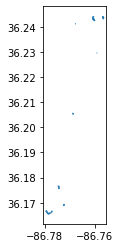

In [49]:
#plot(figsize = 17, 10)
slow_pmr_summer.plot()

<AxesSubplot:>

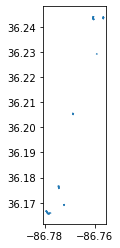

In [50]:
slow_pmr_inschool.plot()

In [51]:
slow_pmr_inschool_geojson = slow_pmr_inschool['geometry'].to_json()

In [52]:
slow_pmr_summer_geojson = slow_pmr_summer['geometry'].to_json()

In [54]:
all_pmr_summer_geojson = all_pmr_summer['geometry'].to_json()

In [56]:
pmr23_map = folium.Map(location =  [36.19, -86.7775], zoom_start = 13)
style1 = {'color': 'red', 'weight' :6}
folium.GeoJson(slow_pmr_inschool_geojson, style_function=lambda x: style1).add_to(pmr23_map)
style2 = {'color': 'blue', 'weight' :3}
folium.GeoJson(slow_pmr_summer_geojson, style_function=lambda x: style2).add_to(pmr23_map)
style3 = {'color': 'gray', 'weight' :1}
folium.GeoJson(all_pmr_summer_geojson, style_function=lambda x: style3).add_to(pmr23_map)
pmr23_map